In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

In [2]:
df = pd.read_csv('kafka_messages.csv')
df.head()

,voter_id,voter_name,date_of_birth,gender,nationality,registration_number,email,phone_number,cell_number,picture,...,candidate_id,candidate_name,party_affiliation,biography,campaign_platform,photo_url,voting_time,vote,polling_station_id,vote_type
0,046c4703-19e7-4b3b-b735-5650937d4e18,Anthony Fowler,1969-01-06T11:26:50.258Z,male,GB,bluefrog390,anthony.fowler@example.com,017687 48228,07831 748911,https://randomuser.me/api/portraits/men/2.jpg,...,34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd,John Duncan,Tech Republic Party,A brief bio of the candidate.,Key campaign promises or platform.,https://randomuser.me/api/portraits/men/72.jpg,2024-09-17 01:25:05,1,PS45678,regular
1,47596ae7-54ab-428c-83d4-93a5e66638f4,Ethan Hunter,1955-09-03T22:08:25.392Z,male,GB,ticklishfish634,ethan.hunter@example.com,017684 50295,07890 765069,https://randomuser.me/api/portraits/men/33.jpg,...,34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd,John Duncan,Tech Republic Party,A brief bio of the candidate.,Key campaign promises or platform.,https://randomuser.me/api/portraits/men/72.jpg,2024-09-17 01:25:07,1,PS90123,regular
2,37c08544-a519-4e1b-9d88-c28cb67244e4,Christina Hunter,1975-06-20T08:00:28.819Z,female,GB,orangerabbit248,christina.hunter@example.com,016973 90703,07737 969185,https://randomuser.me/api/portraits/women/67.jpg,...,39da3ddd-b761-4b17-be68-f6ffb5f9d8ef,Ramon Diaz,Management Party,A brief bio of the candidate.,Key campaign promises or platform.,https://randomuser.me/api/portraits/men/99.jpg,2024-09-17 01:25:09,1,PS56789,regular
3,c0bece62-bdff-4558-9faa-ec03b6e7725c,Roberto Adams,1987-05-09T18:06:14.568Z,male,GB,redostrich928,roberto.adams@example.com,016973 26764,07656 572434,https://randomuser.me/api/portraits/men/24.jpg,...,34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd,John Duncan,Tech Republic Party,A brief bio of the candidate.,Key campaign promises or platform.,https://randomuser.me/api/portraits/men/72.jpg,2024-09-17 01:25:11,1,PS89012,regular
4,3614ba32-1527-46a9-ba4b-4306b1e1da4b,Chloe Hill,1945-03-04T03:57:04.347Z,female,GB,silverfish280,chloe.hill@example.com,015396 33772,07940 081067,https://randomuser.me/api/portraits/women/66.jpg,...,34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd,John Duncan,Tech Republic Party,A brief bio of the candidate.,Key campaign promises or platform.,https://randomuser.me/api/portraits/men/72.jpg,2024-09-17 01:25:14,1,PS45678,regular


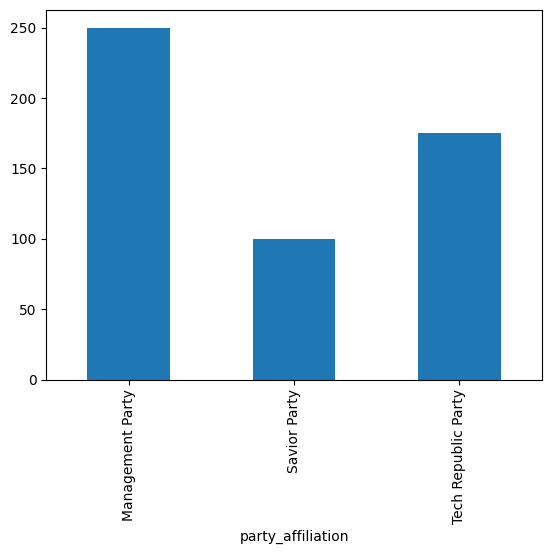

In [3]:
df.groupby('party_affiliation').size().plot(kind='bar')
plt.show()

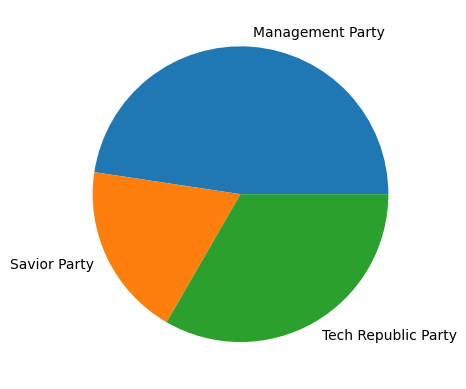

In [4]:
df.groupby('party_affiliation').size().plot(kind='pie')
plt.show()

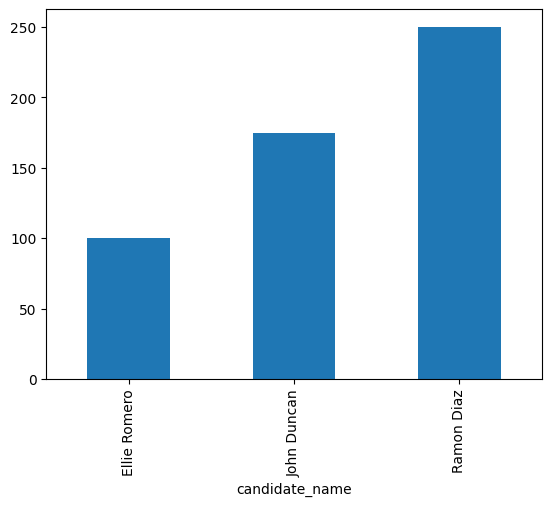

In [5]:
df.groupby('candidate_name').size().plot(kind='bar')
plt.show()

In [6]:
df["district_id"].value_counts()

district_id
DIST_024    75
DIST_008    75
DIST_004    50
DIST_001    50
DIST_003    50
DIST_021    25
DIST_009    25
DIST_005    25
DIST_022    25
DIST_018    25
DIST_019    25
DIST_014    25
DIST_002    25
DIST_007    25
Name: count, dtype: int64

In [7]:
df[["voter_id", "voting_time", "polling_station_id", "candidate_id", "district_id", "vote_type"]].head()

,voter_id,voting_time,polling_station_id,candidate_id,district_id,vote_type
0,046c4703-19e7-4b3b-b735-5650937d4e18,2024-09-17 01:25:05,PS45678,34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd,DIST_021,regular
1,47596ae7-54ab-428c-83d4-93a5e66638f4,2024-09-17 01:25:07,PS90123,34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd,DIST_004,regular
2,37c08544-a519-4e1b-9d88-c28cb67244e4,2024-09-17 01:25:09,PS56789,39da3ddd-b761-4b17-be68-f6ffb5f9d8ef,DIST_001,regular
3,c0bece62-bdff-4558-9faa-ec03b6e7725c,2024-09-17 01:25:11,PS89012,34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd,DIST_024,regular
4,3614ba32-1527-46a9-ba4b-4306b1e1da4b,2024-09-17 01:25:14,PS45678,34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd,DIST_009,regular


In [8]:
votes_on_time = pd.read_csv('grouped_votes.csv')
votes_on_time.head()

,candidate_id,time_stamp,count_each_at_time
0,34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd,2024-09-17 07:01:50,7
1,39da3ddd-b761-4b17-be68-f6ffb5f9d8ef,2024-09-17 07:01:50,10
2,c5c51089-2186-4f48-8255-4c0ab08842d5,2024-09-17 07:01:50,4
3,34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd,2024-09-17 07:01:56,14
4,39da3ddd-b761-4b17-be68-f6ffb5f9d8ef,2024-09-17 07:01:56,20


In [12]:
candidate_1 = votes_on_time[votes_on_time["candidate_id"] == "34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd"]
candidate_2 = votes_on_time[votes_on_time["candidate_id"] == "39da3ddd-b761-4b17-be68-f6ffb5f9d8ef"]
candidate_3 = votes_on_time[votes_on_time["candidate_id"] == "c5c51089-2186-4f48-8255-4c0ab08842d5"]

In [13]:
candidate_1.head()

,candidate_id,time_stamp,count_each_at_time
0,34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd,2024-09-17 07:01:50,7
3,34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd,2024-09-17 07:01:56,14
6,34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd,2024-09-17 07:02:01,21
9,34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd,2024-09-17 07:02:07,28
12,34cee6a9-2ddc-45ba-b2f2-7fb3a251acdd,2024-09-17 07:02:12,35


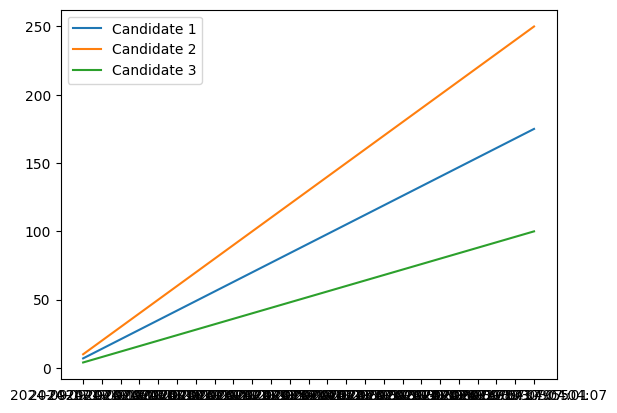

In [14]:
# plot the number of votes in line plot
plt.plot(candidate_1["time_stamp"], candidate_1["count_each_at_time"], label="Candidate 1")
plt.plot(candidate_2["time_stamp"], candidate_2["count_each_at_time"], label="Candidate 2")
plt.plot(candidate_3["time_stamp"], candidate_3["count_each_at_time"], label="Candidate 3")
plt.legend()
plt.show()